In [1]:
import torch
import pygad

In [7]:
import pygad.torchga as torchga

In [9]:
import numpy as np

In [29]:
inputs = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
outputs = torch.tensor([0, 1, 1, 0], dtype=torch.float32).unsqueeze(1)

In [13]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 4),
    torch.nn.ReLU(),
    torch.nn.Linear(4, 1),
    torch.nn.Sigmoid()
)

In [18]:
model(inputs).shape == outputs.shape

True

In [19]:
criterion = torch.nn.BCELoss()

In [31]:
def fitness_func(solution, sol_idx) :
    predictions = torchga.predict(model, solution, inputs)
    fitness = 1.0 / criterion(predictions, outputs).detach().numpy() + 0.00000001
    return fitness

In [21]:
def generation_callback(instance):
    print(f"Generation: {instance.generations_completed}")
    print(f"Fitness: {instance.best_solution()[1]}")

In [22]:
gamodel = torchga.TorchGA(model, 10)

In [32]:
num_generations = 250
num_parents_mating = 5
initial_population = gamodel.population_weights

In [33]:
ga_instance = pygad.GA(num_generations=num_generations, num_parents_mating=num_parents_mating, 
                      fitness_func = fitness_func, initial_population=gamodel.population_weights, 
                      on_generation=generation_callback)

In [34]:
ga_instance.run()

Generation: 1
Fitness: 1.4254833337081665
Generation: 2
Fitness: 1.4355602541952628
Generation: 3
Fitness: 1.4467448845646003
Generation: 4
Fitness: 1.4467448845646003
Generation: 5
Fitness: 1.4467448845646003
Generation: 6
Fitness: 1.505798971149415
Generation: 7
Fitness: 1.505798971149415
Generation: 8
Fitness: 1.505798971149415
Generation: 9
Fitness: 1.5153147248107304
Generation: 10
Fitness: 1.5153147248107304
Generation: 11
Fitness: 1.5308346577154752
Generation: 12
Fitness: 1.5826350006026066
Generation: 13
Fitness: 1.5826350006026066
Generation: 14
Fitness: 1.5827510103504705
Generation: 15
Fitness: 1.6096050559801742
Generation: 16
Fitness: 1.6096050559801742
Generation: 17
Fitness: 1.6292178401354709
Generation: 18
Fitness: 1.6292178401354709
Generation: 19
Fitness: 1.687854135888534
Generation: 20
Fitness: 1.687854135888534
Generation: 21
Fitness: 1.7067958531098708
Generation: 22
Fitness: 1.7487785023340654
Generation: 23
Fitness: 1.7487785023340654
Generation: 24
Fitness: 1

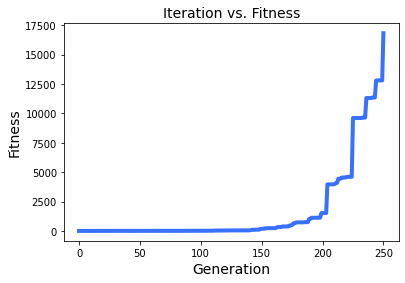

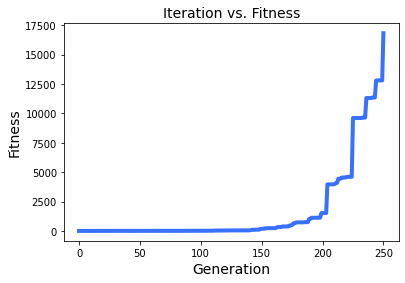

In [36]:
ga_instance.plot_fitness(title="Iteration vs. Fitness", linewidth=4)

In [37]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Fitness value of the best solution = 16821.48842446991
Index of the best solution : 9


In [41]:
predictions = pygad.torchga.predict(model=model,
                                    solution=solution,
                                    data=inputs)
print("Predictions : \n", predictions.detach().numpy())

Predictions : 
 [[1.3598327e-07]
 [1.0000000e+00]
 [9.9999964e-01]
 [2.3729114e-04]]


In [44]:
print("Binary Crossentropy : ", criterion(predictions, outputs).detach().numpy())

Binary Crossentropy :  5.944777e-05


In [69]:
accuracy = np.mean((predictions > 0.5).numpy().astype(float) == outputs.numpy()) * 100
print(f"Accuracy: {accuracy}%")

Accuracy: 100.0%


In [77]:
model.load_state_dict(torchga.model_weights_as_dict(model, solution))

<All keys matched successfully>